In [0]:
import numpy as np
import scipy
import pandas as pd
from sklearn import preprocessing as preproc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime
import random

In [0]:
#SEE: Google Colab's 'External data: Drive, Sheets, and Cloud Storage'
from google.colab import files

In [3]:
#upload file to colab


from google.colab import files
uploaded = files.upload()

Saving A2Z Insurance.csv to A2Z Insurance.csv


In [0]:
import io

abt = pd.read_csv(io.StringIO(uploaded['A2Z Insurance.csv'].decode('utf-8')))


In [7]:
abt.head(3)

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02


# Data Cleaning

In [8]:
#Renaming columns
abt.rename(columns={'Customer Identity':'CustID','First Policy´s Year':'first_policy','Brithday Year':'birthday','Educational Degree':'education','Gross Monthly Salary':'salary',
                    'Geographic Living Area':'area','Has Children (Y=1)':'children','Customer Monetary Value':'lifetime_value','Claims Rate':'claims_rate'},inplace=True)

abt.rename(columns={'Premiums in LOB: Motor':'motor','Premiums in LOB: Household':'household', 'Premiums in LOB: Health':'health',
                    'Premiums in LOB:  Life':'life', 'Premiums in LOB: Work Compensations':'work_compensation'},inplace=True) 
           
print(abt.columns)

Index(['CustID', 'first_policy', 'birthday', 'education', 'salary', 'area',
       'children', 'lifetime_value', 'claims_rate', 'motor', 'household',
       'health', 'life', 'work_compensation'],
      dtype='object')


In [0]:
#checks df data types
#abt.dtypes

In [0]:
# EDUCATION: Convert to binary
#1 : higher education (BSc, MSc, PHD)
#2 : lower education (High School, Basic)

abt['education'] = abt['education'].replace({'1 - Basic':'0', '2 - High School':'0','3 - BSc/MSc':'1','4 - PhD':'1'})


In [0]:
#We drop all rows where the first_policy is above 2018 a

abt.drop(abt[abt.first_policy >= 2018].index, inplace=True)

#abt has 10284 rows left

In [0]:
#MISSING VALUES first_policy & birthday - 

#create new column called timeBetweenFPandBD - measures the difference between the first policy and birthday. This will be averaged and used to 
#plug into NaN cells in first policy and birthday

abt['timeBetweenFPandBD'] = abt['first_policy'] - abt['birthday']

#find the average age of insurance buyers when they buy their first policy. We will plug this value to fill missing
#values in first_policy and birthday. 
#only use timeBetweenFPandBD greater or equal to 18 to calculate average (assuming people can only buy insurance at 18 years old)

AvgYrs = np.floor(abt['timeBetweenFPandBD'].loc[abt['timeBetweenFPandBD'] >= 18].mean())

#AvgYrs = 33


In [0]:
#plugging AvgYrs into NaN for first_policy and birthday

abt ['first_policy'] = abt['first_policy'].fillna(value=abt['birthday'] + AvgYrs)
abt ['birthday'] = abt['birthday'].fillna(value=abt['first_policy'] - AvgYrs)



In [0]:
#drop rows where both first_policy and birthday are NaN

abt = abt.dropna(subset=['first_policy', 'birthday'], how='all');


In [0]:
#there are 9 instances where first_policy is higher than 2018 - Not possible
#there are no instances where birthday is below 1900
abt.loc[abt.first_policy >= 2018 ].count()

CustID                3
first_policy          3
birthday              3
education             2
salary                3
area                  3
children              2
lifetime_value        3
claims_rate           3
motor                 3
household             3
health                3
life                  3
work_compensation     3
timeBetweenFPandBD    0
dtype: int64

In [0]:
#We drop all rows where the first_policy is above 2018 a

abt.drop(abt[abt.first_policy > 2018].index, inplace=True)

#abt has 10289 rows left

In [0]:
#only keeping customers that are 18 years old or older (3 year children don't own house and motor insurance)

abt = abt[abt['timeBetweenFPandBD']>=18]

In [0]:
abt.isnull().sum()

CustID                 0
first_policy           0
birthday               0
education              1
salary                17
area                   0
children               5
lifetime_value         0
claims_rate            0
motor                 17
household              0
health                17
life                  59
work_compensation     49
timeBetweenFPandBD     0
dtype: int64

In [0]:
#dropping rows with 3 or more missing values and filling NaN for life, health, motor and work_compesation with 0s

abt = abt.dropna(thresh=12)
abt['life'] = abt['life'].fillna(0)
abt['motor'] = abt['motor'].fillna(0)
abt['health'] = abt['health'].fillna(0)
abt['work_compensation'] = abt['work_compensation'].fillna(0)
abt = abt.dropna(subset=['education', 'salary', 'children']);

In [0]:
#abt

In [0]:
#abt.dtypes

In [0]:
#NOT NEEDED - ALREADY FLOAT64 - converting first_policy and birthday to numeric so we can convert them to datetime
#abt['first_policy'] = pd.to_numeric(abt['first_policy'], errors='coerce')
#abt['birthday'] = pd.to_numeric(abt['birthday'], errors='coerce')


In [0]:
abt['first_policy'] = pd.to_datetime(abt['first_policy'], format='%Y.0', errors='coerce')
abt['birthday'] = pd.to_datetime(abt['birthday'], format='%Y.0', errors='coerce')



In [0]:
abt.dtypes

CustID                         int64
first_policy          datetime64[ns]
birthday              datetime64[ns]
education                     object
salary                       float64
area                         float64
children                     float64
lifetime_value               float64
claims_rate                  float64
motor                        float64
household                    float64
health                       float64
life                         float64
work_compensation            float64
timeBetweenFPandBD           float64
dtype: object

In [0]:
abt.head(10)

,CustID,first_policy,birthday,education,salary,area,children,lifetime_value,claims_rate,motor,household,health,life,work_compensation,timeBetweenFPandBD
2,3,1991-01-01,1970-01-01,0,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,21.0
5,6,1986-01-01,1956-01-01,0,2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,30.0
6,7,1979-01-01,1943-01-01,0,4103.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34,36.0
9,10,1976-01-01,1948-01-01,1,3842.0,1.0,0.0,-119.35,1.12,209.26,182.25,271.94,39.23,55.12,28.0
10,11,1990-01-01,1945-01-01,1,3995.0,4.0,0.0,290.17,0.53,296.50,116.70,227.71,18.67,10.89,45.0
11,12,1985-01-01,1958-01-01,1,2834.0,3.0,1.0,405.74,0.46,249.49,216.70,252.38,36.34,35.45,27.0
12,13,1981-01-01,1949-01-01,1,3757.0,1.0,0.0,2.34,0.97,206.04,340.05,257.05,43.12,15.78,32.0
19,20,1988-01-01,1962-01-01,1,2751.0,1.0,1.0,352.96,0.36,402.41,9.45,125.69,24.45,30.56,26.0
23,24,1998-01-01,1961-01-01,0,2870.0,4.0,1.0,290.05,0.64,222.04,329.50,248.38,48.01,33.56,37.0
24,25,1988-01-01,1952-01-01,1,3201.0,4.0,0.0,108.13,0.81,420.30,128.35,135.58,15.67,4.78,36.0


# Plotting

In [0]:
x = abt['CustID']
y = abt['salary']


def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 20, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [0]:
abt = abt[abt['salary']<=10000]
x = random.sample(abt['lifetime_value'], 1000)
y = random.sample(abt['salary'], 1000)

scatterplot(x,y, x_label = 'Lifetime Value', y_label = 'Salary', title = 'Customer Salaries')

TypeError: ignored

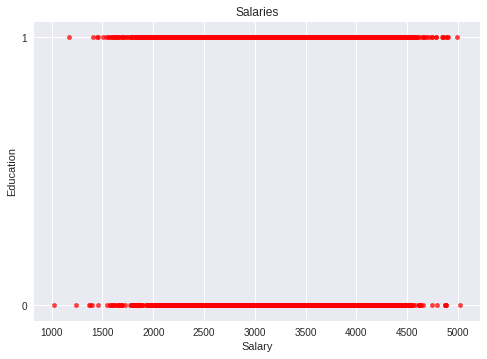

In [0]:
x = abt['salary']
y = abt['education']


scatterplot(x,y,  x_label = 'Salary', y_label = 'Education', title = 'Salaries')

,CustID,first_policy,birthday,education,salary,area,children,lifetime_value,claims_rate,motor,household,health,life,work_compensation,timeBetweenFPandBD


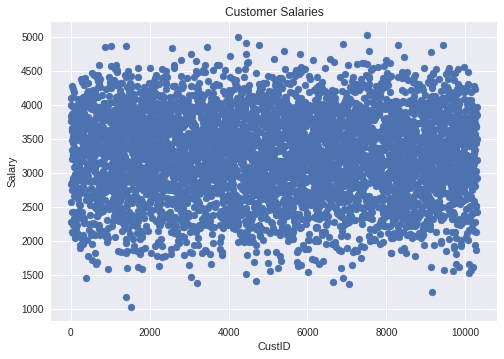

In [0]:
import matplotlib.pyplot as plt

x = abt['CustID']
y = abt['salary']

plt.scatter(x, y)
plt.title("Customer Salaries")
plt.xlabel("CustID")
plt.ylabel("Salary")
plt.show()


# K-Means

In [0]:
abt.head(3)

,CustID,first_policy,birthday,education,salary,area,children,lifetime_value,claims_rate,motor,household,health,life,work_compensation,timeBetweenFPandBD
2,3,1991-01-01,1970-01-01,0,2277.0,3.0,0.0,504.67,0.28,206.15,224.5,124.58,86.35,99.02,21.0
5,6,1986-01-01,1956-01-01,0,2566.0,4.0,1.0,-24.33,1.00,440.75,18.9,114.80,7.00,7.67,30.0
6,7,1979-01-01,1943-01-01,0,4103.0,4.0,0.0,-66.01,1.05,156.92,295.6,317.95,14.67,26.34,36.0


In [0]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


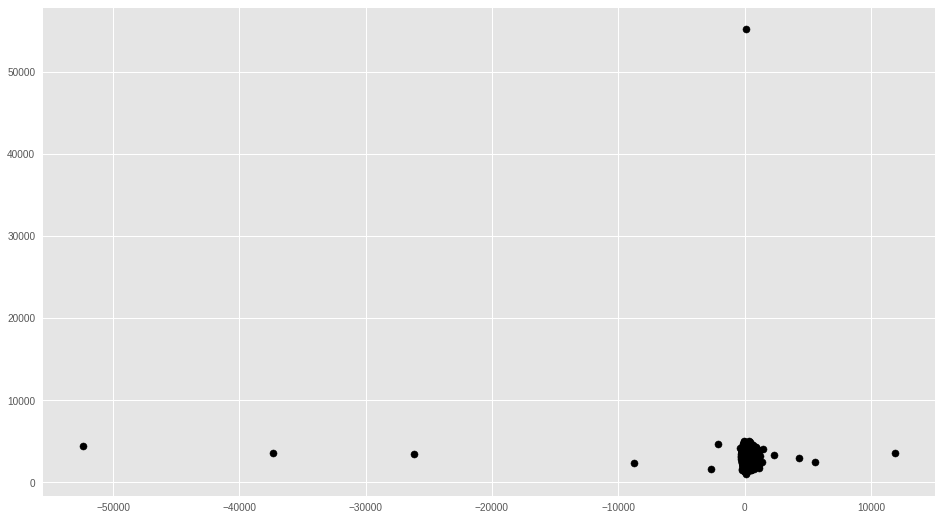

In [0]:
a1 = abt['lifetime_value'].values
a2 = abt['salary'].values
X = np.array(list(zip(a1, a2)))
plt.scatter(a1, a2, c='black', s=50)

In [0]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [0]:
k = 3
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

In [0]:
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[15830. 53649.]
 [41364. 47619.]
 [50921. 21773.]]
[[   212.30306664   3240.72568772]
 [-38613.43         3788.        ]
 [   122.25        55215.        ]]


In [0]:
from sklearn.cluster import KMeans

f3 = abt['salary'].values
f4 = abt['lifetime_value'].values

X=np.array(list(zip(f3,f4)))



In [0]:
kmeans = KMeans(n_clusters=2, verbose=0).fit(X)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

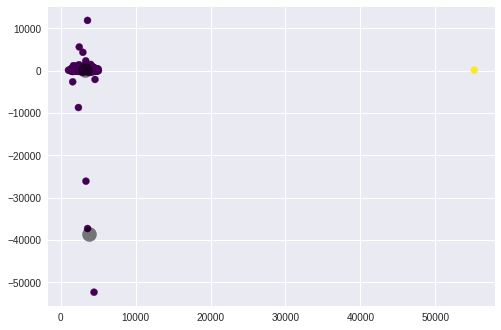

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [0]:
my_data =abt

In [0]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
my_data_complete = abt.dropna()

my_scaler = StandardScaler().fit(my_data_complete[[
                  'lifetime_value',
                  'claims_rate',
                  'salary',
                  'area']])

x = StandardScaler().fit_transform(my_data_complete[[
                  'lifetime_value',
                  'claims_rate',
                  'salary',
                  'area']])
x = pd.DataFrame(x)
x.columns = [
                  'lifetime_value',
                  'claims_rate',
                  'salary',
                  'area']

In [0]:
kmeans = KMeans(n_clusters=5, verbose=0).fit(X)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

No handles with labels found to put in legend.


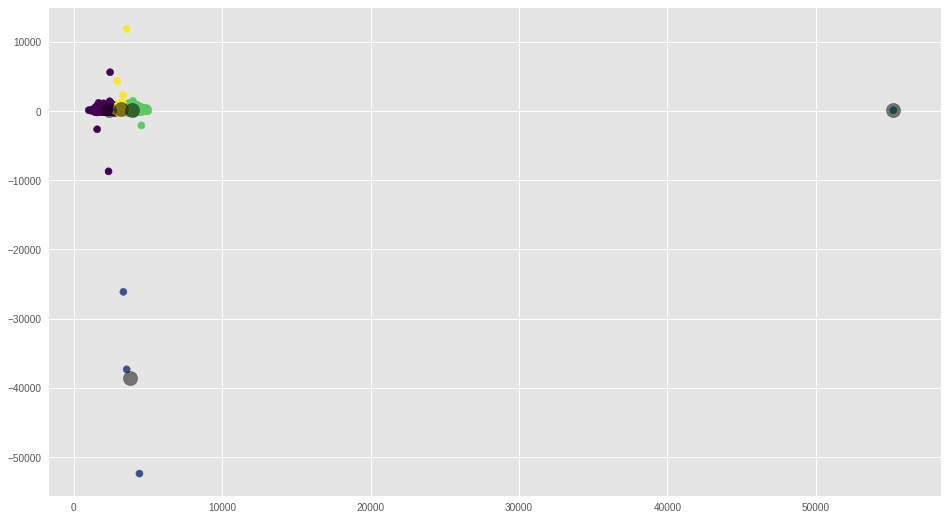

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.legend()
plt.grid(True)

In [0]:
from sklearn.decomposition import PCA
#pca = PCA(n_components= my_data_complete.shape[1])
pca = PCA(n_components= 4)
principalComponents = pca.fit_transform(x)

pca.explained_variance_ratio_

pca.inverse_transform(principalComponents)

array([[ 0.30708885, -0.30690965, -1.01020457,  0.22242582],
       [-0.20875189,  0.20242417, -0.71051934,  1.01417591],
       [-0.24939507,  0.23779458,  0.88330837,  1.01417591],
       ...,
       [-0.18513438,  0.17412785, -0.06552205, -0.56932426],
       [ 1.18560757, -0.50498391, -0.85051071,  0.22242582],
       [ 0.32603552, -0.35642821, -0.34550479, -1.36107435]])

In [0]:
from sklearn.cluster import KMeans

origPCA = pd.DataFrame(principalComponents)


to_clust = pd.concat((x, 
                     origPCA.iloc[:,0:2]), 
                     axis = 1)

my_data_complete = my_data.dropna()



kmeans = KMeans(n_clusters=3, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(to_clust)


kmeans.inertia_

11812.044189011878

In [0]:
#Check the clusters
my_clusters = pd.DataFrame(kmeans.cluster_centers_)
#becase I've used 2 PCAs
my_clusters = my_clusters.iloc[:,:-2]

#my_scaler has the fit parameters
my_scaler.inverse_transform(X = my_clusters)

array([[ 2.16799403e+02,  6.80065253e-01,  3.31454127e+03,
         3.67145188e+00],
       [-3.86134300e+04,  5.47666667e+01,  3.78800000e+03,
         2.66666667e+00],
       [ 2.05719833e+02,  6.85903672e-01,  3.15781688e+03,
         1.32713400e+00]])

# DBSCAN

In [0]:
abt.columns

Index(['CustID', 'first_policy', 'birthday', 'education', 'salary', 'area',
       'children', 'lifetime_value', 'claims_rate', 'motor', 'household',
       'health', 'life', 'work_compensation', 'timeBetweenFPandBD'],
      dtype='object')

In [0]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

test = abt[['salary','health','life','motor','household','claims_rate']]

 
#test = StandardScaler().fit_transform(test)
#To reverse


test = StandardScaler().fit_transform(test)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
Z = linkage(test,
            method = 'ward')#method='single, complete

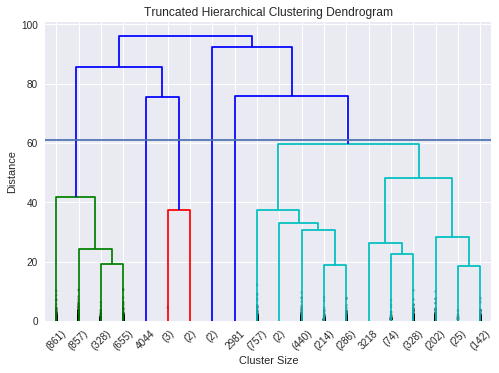

In [0]:
dendrogram(Z,
           #truncate_mode='none',
           truncate_mode='lastp',
           p=20,
           orientation = 'top',
           leaf_rotation=45.,
           leaf_font_size=10.,
           show_contracted=True,
           show_leaf_counts=True)

# =============================================================================
# hierarchy.set_link_color_palette(['c', 'm', 'y', 'g','b','r','k'])
# 
# dendrogram(Z,
#            #truncate_mode='none',
#            truncate_mode='lastp',
#            p=40,
#            orientation = 'top',
#            leaf_rotation=45.,
#            leaf_font_size=10.,
#            show_contracted=True,
#            show_leaf_counts=True, color_threshold=50, above_threshold_color='k')
# =============================================================================


plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

#plt.axhline(y=50)
plt.axhline(y=61)


plt.show()


In [0]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform()

# Test with Blobs Generate sample data
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)

#X = StandardScaler().fit_transform(X)

In [0]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [0]:
# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


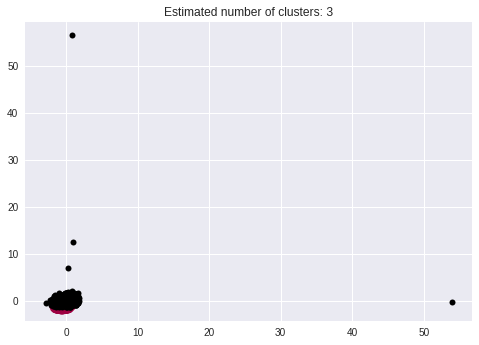

In [0]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# ***MEAN SHIFT CLUSTERING***


```

```



number of estimated clusters : 3


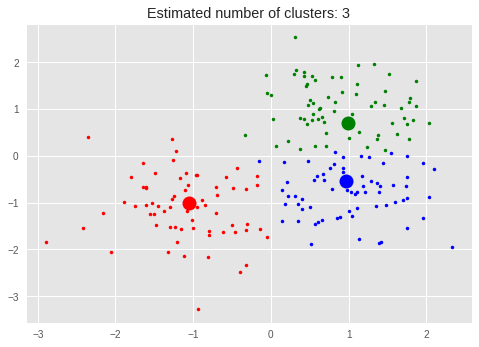

In [0]:
##meanshift clustering


import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=200, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=50)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

[[ 0.68571392  0.95982936  0.91514073]
 [ 4.88225772  5.2137602   5.00269969]
 [ 2.997442   10.10382867 10.02253098]]
Number of estimated clusters: 3


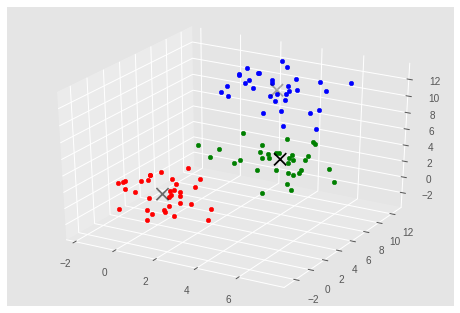

In [0]:
###Hierarchical Clustering with Mean Shift 

import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()